In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from collections import Counter

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.shape

(5171, 4)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5171, 4)

In [10]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
df.drop(columns={'Unnamed: 0', 'label_num'}, inplace=True)

In [12]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [13]:
df.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


## Exploratory Data Analysis

In [14]:
df['label'].value_counts()

label
0    3672
1    1499
Name: count, dtype: int64

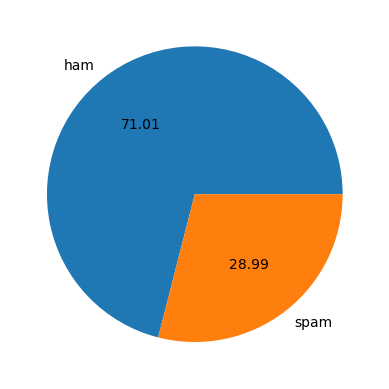

<Figure size 640x480 with 0 Axes>

In [15]:
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%.2f')
plt.show()
plt.savefig("Webbrowsers.png", bbox_inches="tight")

In [16]:
print(df['text'][0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


In [17]:
arr = []
for i in df['text']:
    new_text = nltk.word_tokenize(i)[2:]
    arr.append(" ".join(new_text))

In [18]:
df['text'] = pd.Series(arr)

In [19]:
df.head()

,label,text
0,0,enron methanol ; meter # : 988291 this is a fo...
1,0,"hpl nom for january 9 , 2001 ( see attached fi..."
2,0,"neon retreat ho ho ho , we ' re around to that..."
3,1,"photoshop , windows , office . cheap . main tr..."
4,0,re : indian springs this deal is to book the t...


In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,label,text,num_characters
0,0,enron methanol ; meter # : 988291 this is a fo...,313
1,0,"hpl nom for january 9 , 2001 ( see attached fi...",86
2,0,"neon retreat ho ho ho , we ' re around to that...",2506
3,1,"photoshop , windows , office . cheap . main tr...",394
4,0,re : indian springs this deal is to book the t...,323


In [22]:
df['text'].apply(lambda x : nltk.word_tokenize(x))

0       [enron, methanol, ;, meter, #, :, 988291, this...
1       [hpl, nom, for, january, 9, ,, 2001, (, see, a...
2       [neon, retreat, ho, ho, ho, ,, we, ', re, arou...
3       [photoshop, ,, windows, ,, office, ., cheap, ....
4       [re, :, indian, springs, this, deal, is, to, b...
                              ...                        
5166    [put, the, 10, on, the, ft, the, transport, vo...
5167    [3, /, 4, /, 2000, and, following, noms, hpl, ...
5168    [calpine, daily, gas, nomination, >, >, julie,...
5169    [industrial, worksheets, for, august, 2000, ac...
5170    [important, online, banking, alert, dear, valu...
Name: text, Length: 5171, dtype: object

In [23]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [24]:
df['num_sents'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,label,text,num_characters,num_words,num_sents
0,0,enron methanol ; meter # : 988291 this is a fo...,313,66,3
1,0,"hpl nom for january 9 , 2001 ( see attached fi...",86,22,3
2,0,"neon retreat ho ho ho , we ' re around to that...",2506,549,24
3,1,"photoshop , windows , office . cheap . main tr...",394,47,3
4,0,re : indian springs this deal is to book the t...,323,69,3


In [25]:
df[['num_characters', 'num_words', 'num_sents']].describe()

,num_characters,num_words,num_sents
count,5171.000000,5171.000000,5171.000000
mean,1021.451363,227.181009,13.372462
std,1506.183133,336.487397,32.588023
min,0.000000,0.000000,0.000000
25%,230.000000,50.000000,4.000000
50%,520.000000,120.000000,7.000000
75%,1206.000000,281.500000,15.000000
max,31857.000000,8861.000000,1261.000000


In [26]:
df[df['label']==0][['num_characters', 'num_words', 'num_sents']].describe()

,num_characters,num_words,num_sents
count,3672.000000,3672.000000,3672.000000
mean,951.178922,224.239107,11.442266
std,1361.775273,332.179661,24.892544
min,7.000000,1.000000,1.000000
25%,218.000000,49.000000,3.000000
50%,509.500000,122.000000,6.000000
75%,1199.250000,292.000000,13.000000
max,31857.000000,8861.000000,1204.000000


In [27]:
df[df['label']==1][['num_characters', 'num_words', 'num_sents']].describe()

,num_characters,num_words,num_sents
count,1499.000000,1499.000000,1499.000000
mean,1193.593062,234.387592,18.100734
std,1800.909488,346.821249,45.991131
min,0.000000,0.000000,0.000000
25%,267.500000,53.000000,4.000000
50%,554.000000,114.000000,9.000000
75%,1226.500000,242.000000,19.000000
max,21739.000000,3961.000000,1261.000000


c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


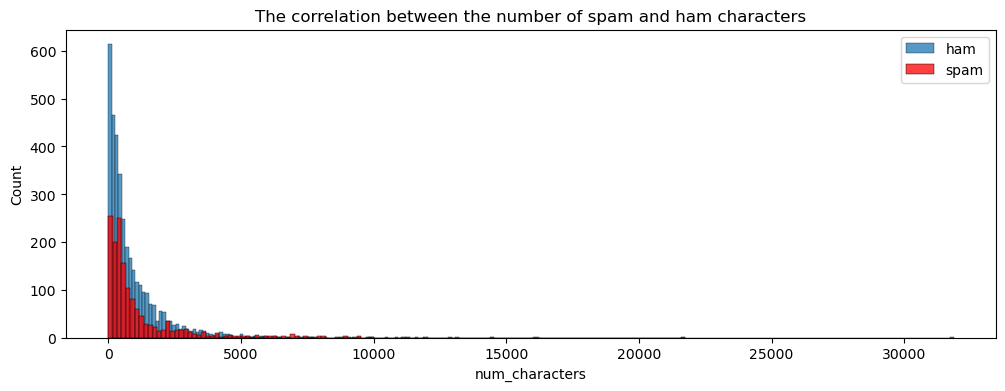

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(12, 4))
sns.histplot(df[df['label']==0]['num_characters'], label='ham')
sns.histplot(df[df['label']==1]['num_characters'], label='spam', color='red')
plt.title('The correlation between the number of spam and ham characters')
plt.legend()
plt.show()
plt.savefig('characters.png')

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


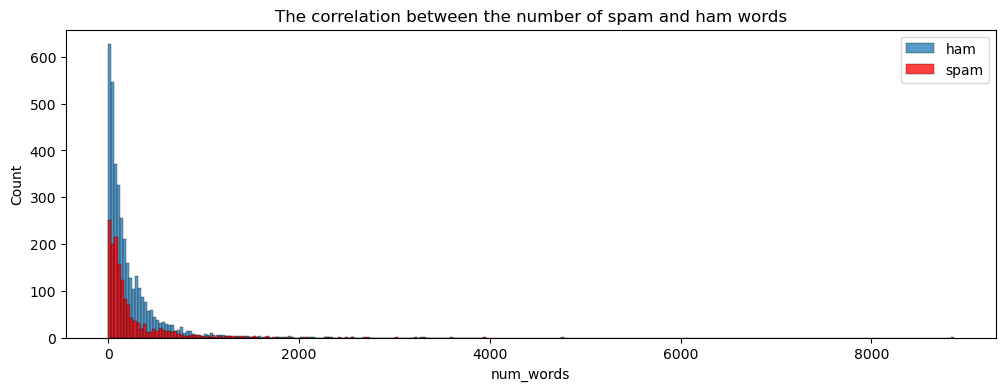

In [29]:
plt.figure(figsize=(12, 4))
sns.histplot(df[df['label']==0]['num_words'], label='ham')
sns.histplot(df[df['label']==1]['num_words'], label='spam', color='red')
plt.title('The correlation between the number of spam and ham words')
plt.legend()
plt.show()

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


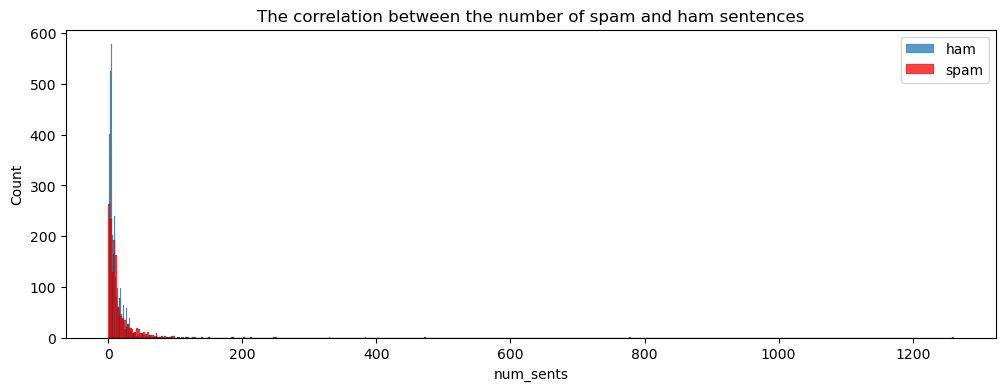

In [30]:
plt.figure(figsize=(12, 4))
sns.histplot(df[df['label']==0]['num_sents'], label='ham')
sns.histplot(df[df['label']==1]['num_sents'], label='spam', color='red')
plt.title('The correlation between the number of spam and ham sentences')
plt.legend()
plt.show()

## Data Preprocessing

In [31]:
def transformed_text(text):
    ps = PorterStemmer()
    text = text.lower()
    text = nltk.word_tokenize(text)
    lst = []
    for i in text:
        if i.isalnum():
            lst.append(i)
    text = lst[:]
    lst.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            lst.append(i)
    text = lst[:]
    lst.clear()
    for i in text:
        lst.append(ps.stem(i))
    return " ".join(lst)

In [32]:
df['transformed_text'] = df['text'].apply(transformed_text)

In [33]:
df.head()

,label,text,num_characters,num_words,num_sents,transformed_text
0,0,enron methanol ; meter # : 988291 this is a fo...,313,66,3,enron methanol meter 988291 follow note gave m...
1,0,"hpl nom for january 9 , 2001 ( see attached fi...",86,22,3,hpl nom januari 9 2001 see attach file hplnol ...
2,0,"neon retreat ho ho ho , we ' re around to that...",2506,549,24,neon retreat ho ho ho around wonder time year ...
3,1,"photoshop , windows , office . cheap . main tr...",394,47,3,photoshop window offic cheap main trend abas d...
4,0,re : indian springs this deal is to book the t...,323,69,3,indian spring deal book teco pvr revenu unders...


In [34]:
print(df['transformed_text'][0])
print(df['text'][0])

enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos
enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes .


In [35]:
spam_words = []
for text in df[df['label'] == 1]['transformed_text'].to_list():
    for word in text.split():
        spam_words.append(word)

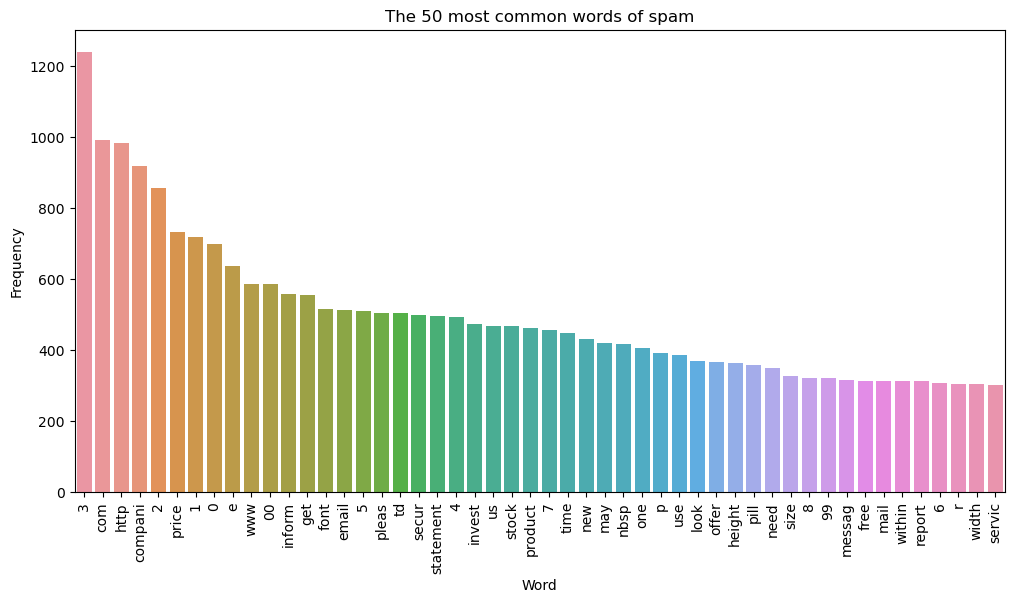

In [36]:
data_spam_word = pd.DataFrame(Counter(spam_words).most_common(50), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(data_spam_word, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.title('The 50 most common words of spam')
plt.show()

In [37]:
ham_words = []
for text in df[df['label'] == 0]['transformed_text'].to_list():
    for word in text.split():
        ham_words.append(word)

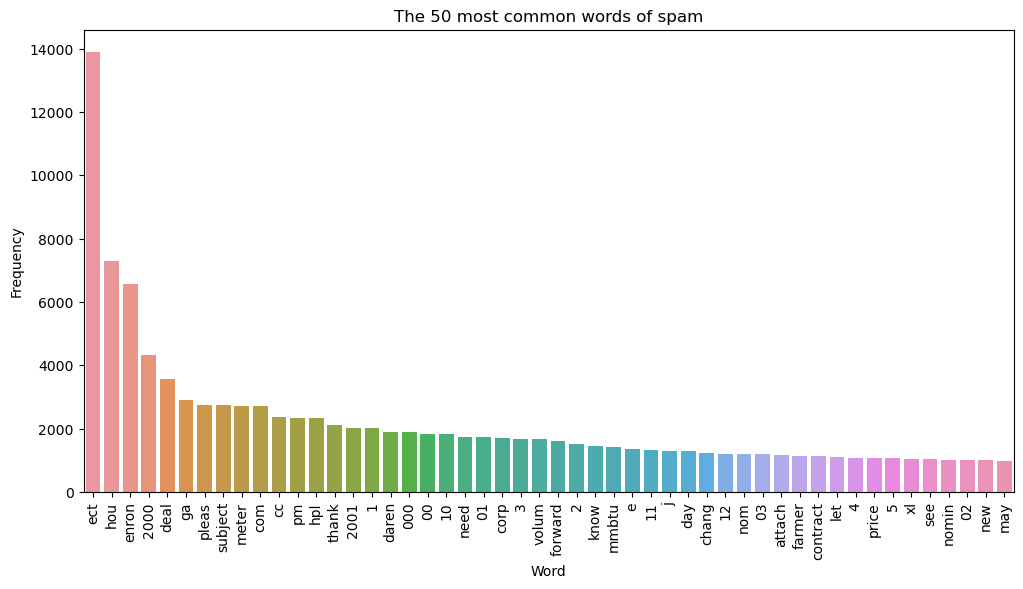

In [38]:
data_ham_word = pd.DataFrame(Counter(ham_words).most_common(50), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(data_ham_word, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.title('The 50 most common words of spam')
plt.show()

## Cross Validation

In [39]:
import sklearn
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

In [40]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [41]:
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'].values, test_size=0.3, random_state=5)

In [44]:
print(X_train.shape)
print(X_test.shape)

(3619, 42592)
(1552, 42592)


In [45]:
nb_clf = MultinomialNB()
svm_clf = SVC(kernel='rbf', gamma=0.9, C=10, degree=2)
cross_val_nb = cross_validate(nb_clf, X_train, y_train, cv=10, return_estimator=True)
cross_val_svm = cross_validate(svm_clf, X_train, y_train, cv=10, return_estimator=True)

In [64]:
print(cross_val_nb['test_score'])
print(cross_val_nb['estimator'])

[0.88674033 0.89779006 0.89502762 0.88674033 0.89779006 0.88121547
 0.89779006 0.90331492 0.88121547 0.90027701]
[MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB(), MultinomialNB()]


In [47]:
cross_val_nb.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score'])

In [48]:
lst_nb = []
for i in cross_val_nb['estimator']:
    lst_nb.append(i.score(X_test, y_test))
arr_nb = np.array(lst_nb)

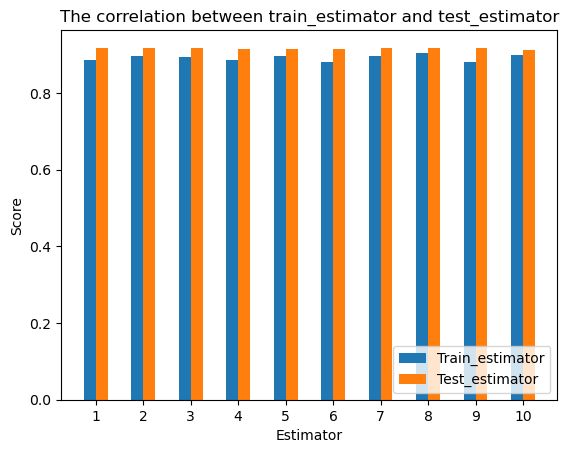

In [49]:
bar_witdh = 0.25
plt.bar(np.arange(1, len(cross_val_nb['test_score'])+1), cross_val_nb['test_score'], width=bar_witdh, label = 'Train_estimator')
plt.bar(np.arange(1, len(arr_nb)+1)+bar_witdh, arr_nb, width=bar_witdh, label = 'Test_estimator')
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.xticks(np.arange(len(arr_nb))+1+bar_witdh/2, np.arange(len(arr_nb))+1)
plt.legend(loc='lower right')
plt.title('The correlation between train_estimator and test_estimator')
plt.show()

In [50]:
df_estimator_nb = pd.DataFrame({'Train_estimator_score':cross_val_nb['test_score'], 'Test_estimator_score':arr_nb})
df_estimator_nb

,Train_estimator_score,Test_estimator_score
0,0.886740,0.918170
1,0.897790,0.917526
2,0.895028,0.917526
3,0.886740,0.914304
4,0.897790,0.915593
5,0.881215,0.915593
6,0.897790,0.918170
7,0.903315,0.916237
8,0.881215,0.916237
9,0.900277,0.913015


In [51]:
lst_svm = []
for i in cross_val_svm['estimator']:
    lst_svm.append(i.score(X_test, y_test))
arr_svm = np.array(lst_svm)

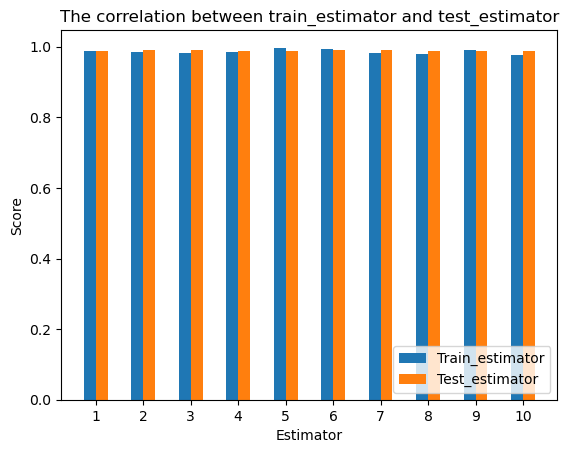

In [52]:
bar_width_svm = 0.25
plt.bar(np.arange(1, len(cross_val_svm['test_score'])+1), cross_val_svm['test_score'], width=bar_width_svm, label='Train_estimator')
plt.bar(np.arange(1, len(arr_svm)+1)+bar_width_svm, arr_svm, width=bar_width_svm, label='Test_estimator')
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(np.arange(len(arr_svm))+ 1 + bar_width_svm/2, np.arange(len(arr_svm))+1)
plt.title('The correlation between train_estimator and test_estimator')
plt.show()

In [53]:
df_estimator_svm = pd.DataFrame({'Train_estimator_score':cross_val_svm['test_score'], 'Test_estimator_Score':arr_svm})
df_estimator_svm

,Train_estimator_score,Test_estimator_Score
0,0.988950,0.989046
1,0.986188,0.990335
2,0.983425,0.989691
3,0.986188,0.989046
4,0.997238,0.988402
5,0.994475,0.990335
6,0.983425,0.989691
7,0.980663,0.988402
8,0.991713,0.989046
9,0.977839,0.988402


## Model Building

In [54]:
clfs = {
    'NB':nb_clf,
    'SVM':svm_clf
}

In [55]:
def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, recall, precision, f1

In [56]:
scores_evaluation_nb = train_classifier(nb_clf, X_train, y_train, X_test, y_test)

In [57]:
scores_evaluation_svm = train_classifier(svm_clf, X_train, y_train, X_test, y_test)

In [58]:
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
def scores_arr(score):
    accuracy, recall, precision, f1 = score
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)

In [59]:
scores_arr(scores_evaluation_nb)
scores_arr(scores_evaluation_svm)

In [60]:
performance_df = pd.DataFrame({'Model': clfs.keys(), 'Accuracy':accuracy_scores, 'Recall':recall_scores, 'Precision':precision_scores, 'F1':f1_scores})
performance_df

,Model,Accuracy,Recall,Precision,F1
0,NB,0.922680,0.725173,0.996825,0.839572
1,SVM,0.989691,0.995381,0.968539,0.981777


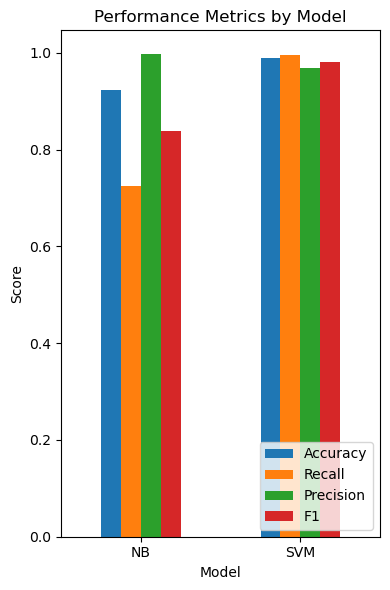

In [61]:
fig, ax = plt.subplots(figsize = (4, 6))
performance_df.plot(x='Model', y=['Accuracy', 'Recall', 'Precision', 'F1'], kind='bar', ax=ax)
plt.title('Performance Metrics by Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation = 0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [62]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(svm_clf,open('model.pkl','wb'))